In this notebook, basic visualization of dataset will be done.

In [1]:
# Let's import required libraries
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa19/data.csv


Let's first read our dataset and take a quick look what we have.

In [2]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


I want to drop some columns because we don't need them for visualization.

In [3]:
data.drop(["ID"],axis=1,inplace = True)
data.drop(["Photo"],axis=1,inplace = True)
data.drop(["Flag"],axis=1,inplace = True)
data.drop(["Club Logo"],axis=1,inplace = True)

Check the data again.

In [4]:
data.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Now we are better. Let's get more informations about our dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [6]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'G

Let' see our heatmap.

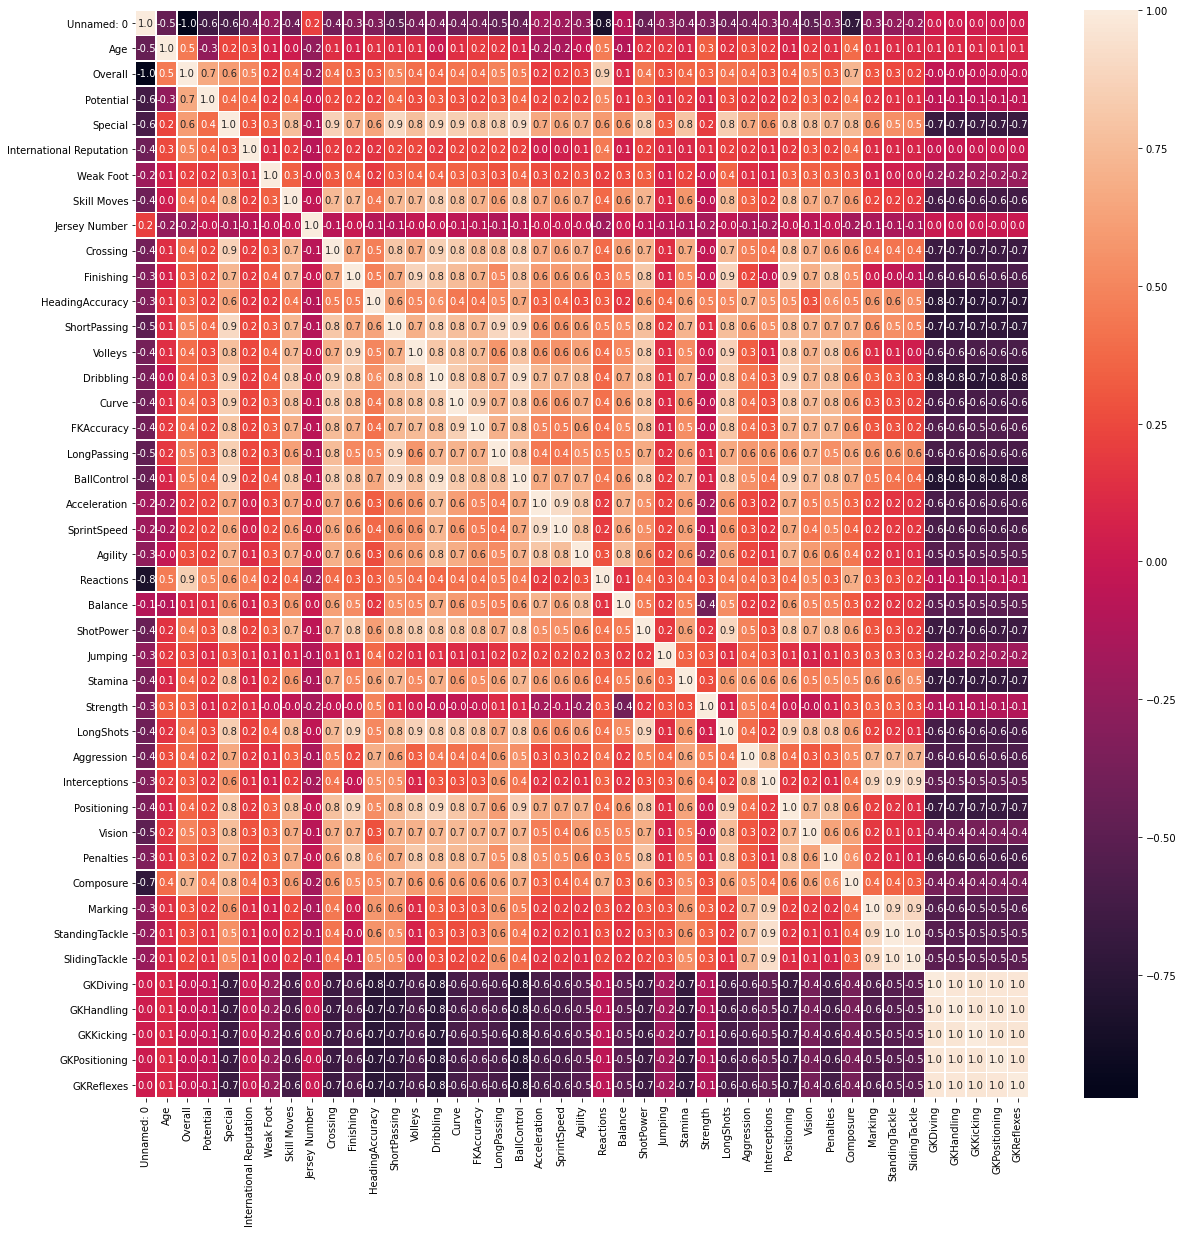

In [7]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id="2"></a> <br>
### Basic Visualization by using MATPLOTLIB Library
Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.
* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle  

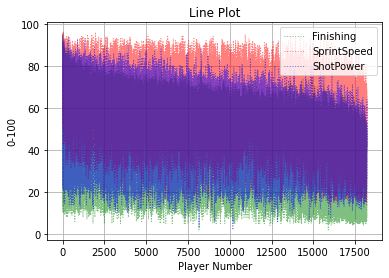

In [8]:
# Line Plot
data.Finishing.plot(kind = 'line', color = 'g',label = 'Finishing',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.SprintSpeed.plot(kind = 'line',color = 'r',label = 'SprintSpeed',linewidth=1, alpha = 0.5,grid = True,linestyle = ':')
data.ShotPower.plot(kind = 'line',color = 'b',label = 'ShotPower',linewidth=1, alpha = 0.5,grid = True,linestyle = ':')
plt.legend(loc='upper right')     
plt.xlabel('Player Number')              
plt.ylabel('0-100')
plt.title('Line Plot')            
plt.show()

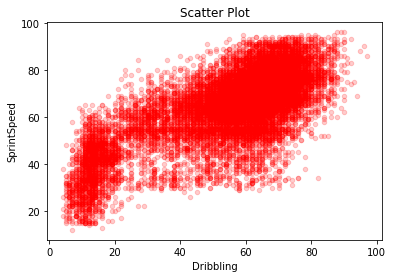

In [9]:
# Scatter Plot 
data.plot(kind='scatter', x='Dribbling', y='SprintSpeed',alpha = 0.2,color = 'red')
plt.xlabel('Dribbling')             
plt.ylabel('SprintSpeed')
plt.title('Scatter Plot')           
plt.show()

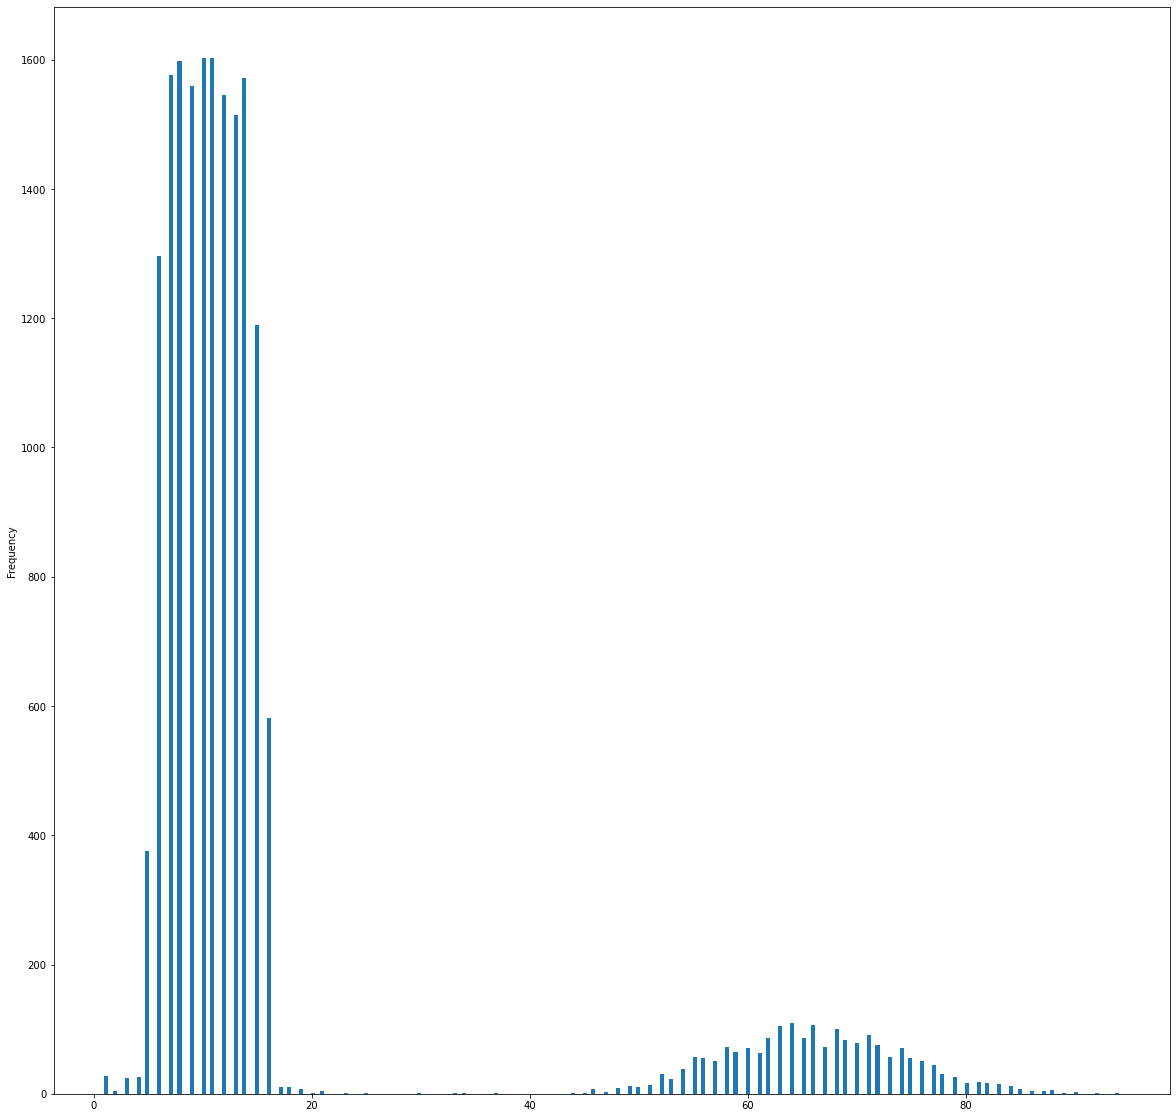

In [10]:
# Histogram
data.GKReflexes.plot(kind = 'hist',bins = 250,figsize = (20,20))
plt.show()